# ISMT E-111 Coding Challenge Spring 2021
### Make sure to include any relevant code when providing all answers :)
### Save this as a `.ipynb` file with all results visible and send it to Vasya when you're done.  

### Challenge is out of 150 points 
  * **100 points for the main challenge**
  * **50 bonus points for extra credit**

# PRABHA KRAMADHATI 

### 1. Load your Data and Take a Look

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`15 pts`)** Load the training data (found in the same github repo as this notebook) into this notebook using Pandas. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`5 pts`)** Show the first 10 lines of the data.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('codingdata.csv')

In [4]:
df.shape

(68353, 12)

In [5]:
df.head(10)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
5,EMA00081000131660,1,1.5,1,G,2,NaN,2,416,11.0,0.0,0
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0
7,EMA00081000269630,1,0.7,2,G,2,21.0,2,1241,6.0,2.0,0
8,EMA00081000287790,1,2.0,1,G,2,NaN,3,655,11.0,4.0,0
9,EMA00081000367310,2,0.5,1,G,2,40.0,3,655,11.0,0.0,0


### 2.  Define and describe your target variable
The `email status` column contains three values with the following definitions.  
`0=ignored` `1=read` and `2=converted`
* Ignored means that the customer did not interact with the email
* Read means that a customer opened the email
* Converted means that the customer clicked on the link for the product page within the email. 

The company considers status=2 as a conversion, (statuses 0 and 1 are non-conversions).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`10 pts`)** Create a new column called `conversion` that has a value of `1` when the email led to a conversion and is 0 otherwise.

In [6]:
df['conversion'] = df['Email_Status'].apply(lambda x: 1 if x == 2 else 0)

In [7]:
df.tail(10)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,conversion
68343,EMA00089990006700,2,0.1,1,D,1,0.0,2,840,NaN,0.0,1,0
68344,EMA00089990097400,1,1.1,2,A,2,NaN,2,504,NaN,0.0,0,0
68345,EMA00089991651300,2,0.1,2,F,3,41.0,2,1038,NaN,15.0,0,0
68346,EMA00089992519500,1,1.2,2,E,2,30.0,3,565,14.0,3.0,1,0
68347,EMA00089994827000,1,0.0,2,NaN,3,32.0,3,1173,9.0,0.0,2,1
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0,0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.**  **(`10 pts`)** How many conversions are in this dataset?

In [8]:
print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversions: 2373 out of 68353


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.**  **(`10 pts`)** What percent of all emails resulted in a conversion?

In [9]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 3.47%


### 3 Exploration

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** The `Email_Campaign_Type` column captures the campaign under which the email was sent. A campaign is a marketing strategy.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.**  **(`15 pts`)** Which campaign led to the most conversions?

In [10]:
most_conversions_df=pd.DataFrame(
    df.groupby(
        by='Email_Campaign_Type'
    )['conversion'].sum()
)

In [11]:
most_conversions_df

,conversion
Email_Campaign_Type,
1,173
2,712
3,1488


In [12]:
#CAMPAIGN 3 has the most number of converstions 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.**  **(`15 pts`)** Which campaign has the highest conversion rate?

In [13]:
pd.DataFrame(
    df.groupby(
        by='Email_Campaign_Type'
    )['conversion'].count()
)

,conversion
Email_Campaign_Type,
1,736
2,48273
3,19344


In [14]:
conversion_rate = df.groupby(
    by='Email_Campaign_Type'
)['conversion'].sum() / df.groupby(
    by='Email_Campaign_Type'
)['conversion'].count() * 100.0

In [15]:
pd.DataFrame(conversion_rate)

,conversion
Email_Campaign_Type,
1,23.505435
2,1.474945
3,7.692308


In [16]:
#CAMPAIGN 1 has the highest conversion rate 

In [17]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
conversion                       0
dtype: int64

In [18]:
df.dropna(subset=['Total_Past_Communications'])

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,conversion
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1,0
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0,0


In [19]:
df['con_version'] = df['conversion'].apply(lambda x: 'Converted(LinkCliked)' if x == 1 else 'Ignored/Read')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b**.
`Total_Past_Communications` is a count of the number of times the customer has been contacted prior to the current email. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** **(`11 pts`)** Create a box plot showing the distribution of `Total_Past_Communications` by `conversion`. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii** **(`5 pts`)** How do conversions relate to the number of times a customer had been emailed?  You can provide your answer as a comment in its own cell (remember a comment is preceded by a hash symbol `#here is my comment`)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** **(`3 pts`)** Set the title to something that briefly summarizes your key insight from the preceding question (3bii).  Set the x-label to be `Email Status` and the y-label to be `Previous Emails`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv** **(`1 pts`)** Prevent the default text `'Boxplot grouped by conversion'` from displaying in the title of the boxplot, and do not show extreme values / outliers.  Then show your plot!

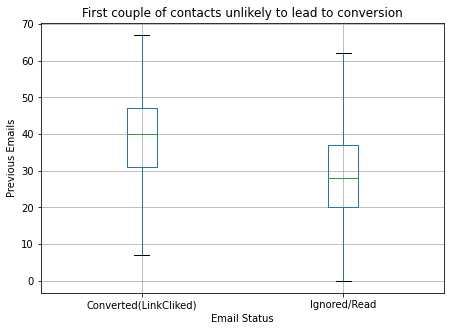

In [20]:
ax = df[['con_version', 'Total_Past_Communications']].boxplot(
    by='con_version',
    showfliers=False,
    figsize=(7,5)
)

ax.set_xlabel('Email Status')
ax.set_ylabel('Previous Emails')
ax.set_title('First couple of contacts unlikely to lead to conversion')

plt.suptitle("")
plt.show()

In [21]:
#Almost no converstions were made with the first 7-8 emails.
#75% of the converstion were made after the 30th email
#Median number of emails at which customers converted is 10 more than the median of non-converted emails.


***
You're done!  You can relax and submit this assignment! <br>If you're feeling ambitious, you can try your hand at the _extra credit_ portion below.  

***
# Extra Credit: Build, Interpret and Assess a Machine Learning Model to Predict Conversion Rate

**1.  Data Cleaning & Prep** 
We'll be encoding a categorical variable, joining it to all of our numerical variables and generating a train-test split to train and test our model.<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Which columns are categorical columns and which are numerical? Create a list of categorical column names and a list of numerical column names. Ignore the following columns: `Email_ID`, `Email_Status`, `conversion`.  You should have ten columns to categorize.  Save each list to a variable (e.g., `my_var = ['a', 'b', 'c']`)

In [22]:
df.dtypes

Email_ID                      object
Email_Type                     int64
Subject_Hotness_Score        float64
Email_Source_Type              int64
Customer_Location             object
Email_Campaign_Type            int64
Total_Past_Communications    float64
Time_Email_sent_Category       int64
Word_Count                     int64
Total_Links                  float64
Total_Images                 float64
Email_Status                   int64
conversion                     int64
con_version                   object
dtype: object

In [23]:
categorical_var=['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']

In [24]:
numerical_var=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images']

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`2.5 pts`)** A few of the columns have missing values.  Let's just drop them.  To do that you can run `df.dropna(inplace=True)` where `df` is the name of your dataframe. That's it, this one's easy, no tricks.

In [25]:
df.dropna(inplace=True)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`10 pts`)** Add Dummy Variables!   (Hint: Follow the code in chapter 4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i.** Using `pd.get_dummies(<your_column_of_data>, drop_first=True)`, create a new dataframe that contains the dummy-variable version of `Email_Campaign_Type`.  **Note/Warning:** This is a bit different than we did in class since we use the `drop_first` argument.  `drop_first` means:  Don't encode Campaign 1, just tell me how good Campaigns 2 & 3 are in relation to Campaign 1.  This is necessary for the model to produce sensible results<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii.** Rename the columns of this dataframe to be `'Campaign_2','Campaign_3'`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii.** Concatenate this dataframes to the email data dataframe.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv.** Create a variable called `all_features` that is a list of all the variables we want to use in our model.  This will be all numerical variables and the dummy variables `'Campaign_2','Campaign_3'`.<br>


In [26]:
df['Email_Campaign_Type'].unique()

array([2, 3, 1], dtype=int64)

In [27]:
Email_Campaign_Type_encoded_df = pd.get_dummies(df['Email_Campaign_Type'], drop_first=True)
Email_Campaign_Type_encoded_df.columns = ['Campaign_%s' % x for x in Email_Campaign_Type_encoded_df.columns]

In [28]:
Email_Campaign_Type_encoded_df.head()

,Campaign_2,Campaign_3
0,1,0
2,0,1
3,1,0
4,0,1
6,1,0


In [29]:
df = pd.concat([df, Email_Campaign_Type_encoded_df], axis=1)

In [30]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,conversion,con_version,Campaign_2,Campaign_3
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0,0,Ignored/Read,1,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1,0,Ignored/Read,0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0,0,Ignored/Read,1,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0,0,Ignored/Read,0,1
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0,0,Ignored/Read,1,0


In [31]:
all_features=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Links','Total_Images','Campaign_2','Campaign_3']
response='conversion'

In [32]:
sample_df = df[all_features + [response]]

In [33]:
sample_df.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Campaign_2,Campaign_3,conversion
0,2.2,33.0,440,8.0,0.0,1,0,0
2,0.1,36.0,962,5.0,0.0,0,1,0
3,3.0,25.0,610,16.0,0.0,1,0,0
4,0.0,18.0,947,4.0,0.0,0,1,0
6,3.2,34.0,116,4.0,0.0,1,0,0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.** **(`7.5 pts`)** Split the dataframe into 80% training data and 20% testing data using the `train_test_split` function (see section 3 of the notebook from Chapter 8 for an example of how to do this.) When you pass the data to be split, be sure to add an intercept!  To do this simply pass `sm.add_constant(df[all_features])` instead of just `df[all_features]`.  Finally, add the following argument to train_test_split:  `random_state=42`

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
import statsmodels.api as sm

In [36]:
x_train, x_test, y_train, y_test = train_test_split(sm.add_constant(df[all_features]), df[response], test_size=0.2, random_state=42)

**2.  Build, interpret and score a logistic regression model!** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**a.** **(`5 pts`)** Build a Logistic Regression using statsmodels (statsmodels.api) as in Chapter 3.  Only include the *train* data you created in question 1d.<br>

In [37]:
x_train.head()

,const,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Campaign_2,Campaign_3
68084,1.0,0.1,61.0,311,4.0,2.0,0,1
29557,1.0,1.3,16.0,704,6.0,0.0,1,0
46822,1.0,0.3,33.0,713,19.0,15.0,0,1
23701,1.0,0.4,36.0,778,14.0,0.0,1,0
57358,1.0,1.8,25.0,251,11.0,8.0,1,0


In [38]:
logit = sm.Logit(
    y_train,
    x_train
)

In [39]:
fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.130311
         Iterations 8


In [40]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                38632
Model:                          Logit   Df Residuals:                    38624
Method:                           MLE   Df Model:                            7
Date:                Tue, 04 May 2021   Pseudo R-squ.:                  0.1396
Time:                        16:15:24   Log-Likelihood:                -5034.2
converged:                       True   LL-Null:                       -5850.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.1668      0.147     -7.951      0.000      -1.454      -0.879
Subject_Hotness_Score         0.1180      0.064      1.843      0.065      -0.008       0.244
Total_Past_Communications     0.0607      0.003     17.377      0.000       0.054       0.068
Word_Count                 2.622e-05      0.000      0.196      0.844      -0.000       0.000
Total_Links                   0.0229      0.007      3.119      0.002       0.008       0.037
Total_Images                 -0.0047      0.008     -0.579      0.563      -0.021       0.011
Campaign_2                   -5.2454      0.210    -25.029      0.000      -5.656      -4.835
Campaign_3                   -3.9877      0.196    -20.329      0.000      -4.372      -3.603
=============================================================================================
"""

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**b.** **(`10 pts`)** Take a look at the model summary and interpret the results. <br>Remember that `Campaign_2` & `Campaign_3` are encoded in relation to `Campaign_1`, when interpretting them remember to mention that their effect is relative to `Campaign_1` (think in terms of negative vs positive coefficients).  <br> 
You can provide your answer as a comment (`# Anything following a hash mark is a comment`) or in any other manner you like.<br>

In [41]:
#Word count and total images have no corelation to conversion.
#Total links and Total past communications have some positive corelation with conversion.
#The coefficent of the subject hotness score indicates a positive co-relation with conversion but the p value indicates that this co-relation may not be significant.
# Compared to campaign_1, campaign_2 is lot less likely than campaign_3 to lead to a converstion


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**c.** **(`5 pts`)** Use your model to get predictions using the test data.  Remember that your fit model is the result of the `.fit()` call (e.g., `my_fit = my_model.fit()`).  The resulting object has a `.predict` method (e.g., `my_fit.predict()`) that will generate predictions using your model on the specified data.  <br>Get predictions by applying the model you just fit to the _test_ data.  Save the predictions to a variable.<br>

In [42]:
x_pred=fit.predict(x_test)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**d.**  **(`5 pts`)** The ROC AUC score informs you as to how good your model is at telling which emails are more likely to result in conversions than others. You can use the Scikit-Learn function `sklearn.metrics.roc_auc_score` to compute this. This function has two inputs: predictions and the actual value from the data.  You already have both of these variables. *You may want to take a look at Chapter 8's Notebook for more details on this metric*

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, x_pred)

0.8058759044426417

# PRABHA KRAMADHATI